# Myers Briggs Personalities - Exploratory Data Analysis

### Install Initial Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
import os

CSV_DATA_PATH = os.path.join("data", "mbti_1.csv")

def load_csv_data(csv_file_path : str = CSV_DATA_PATH):
    """ Load data from a given csv file into a pandas DataFrame object.

    Args:
        csv_file_path (str) - The file path of the csv file containing the desired data to load into a pandas DataFrame object.

    Returns:
        data (pandas.DataFrame) - The loaded data as a pandas DataFrame object.
    """
    assert csv_file_path.endswith(".csv")

    return pd.read_csv(csv_file_path)

In [3]:
data = load_csv_data()
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [4]:
data["posts"].iloc[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


### Analysis

##### Personality Factors

In [6]:
def get_personality_factors(personality_dataset: pd.DataFrame, personalities_col_name : str = "type"):
    """ Return a dictionary containing the personality factors from the given pandas DataFrame containing Myers Briggs personalities.

    Args:
        personality_dataset (pandas.DataFrame) - The pandas DataFrame object containing the Myers Briggs personalities data.
        personalities_col_name (str) - The name of the column which contains the Myers Briggs personalities in the given DataFrame.

    Returns:
        personality_factors_dict (dict) - A dictionary containing the number personality factors, split into Extraversion vs Introversion, Sensing vs Intuition, Thinking vs Feeling, Judging vs Perceiving.
    """
    personality_factors_dict = {
        "e_vs_i": [],
        "s_vs_n": [],
        "t_vs_f": [],
        "j_vs_p": []
    }

    for index, row in data.iterrows():
        personality_type_str = row[personalities_col_name]
        e_vs_i = personality_type_str[0]
        s_vs_n = personality_type_str[1]
        t_vs_f = personality_type_str[2]
        j_vs_p = personality_type_str[3]

        personality_factors_dict["e_vs_i"].append(e_vs_i)
        personality_factors_dict["s_vs_n"].append(s_vs_n)
        personality_factors_dict["t_vs_f"].append(t_vs_f)
        personality_factors_dict["j_vs_p"].append(j_vs_p)

    return personality_factors_dict    

In [7]:
from itertools import zip_longest

personality_factors_dict = get_personality_factors(data)

columns = personality_factors_dict.keys()
values = list(zip_longest(*personality_factors_dict.values()))
personality_factors = pd.DataFrame(values, columns=columns)
personality_factors.head()

,e_vs_i,s_vs_n,t_vs_f,j_vs_p
0,I,N,F,J
1,E,N,T,P
2,I,N,T,P
3,I,N,T,J
4,E,N,T,J


C:\Users\stefa\AppData\Local\Temp\ipykernel_1996\4270425909.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


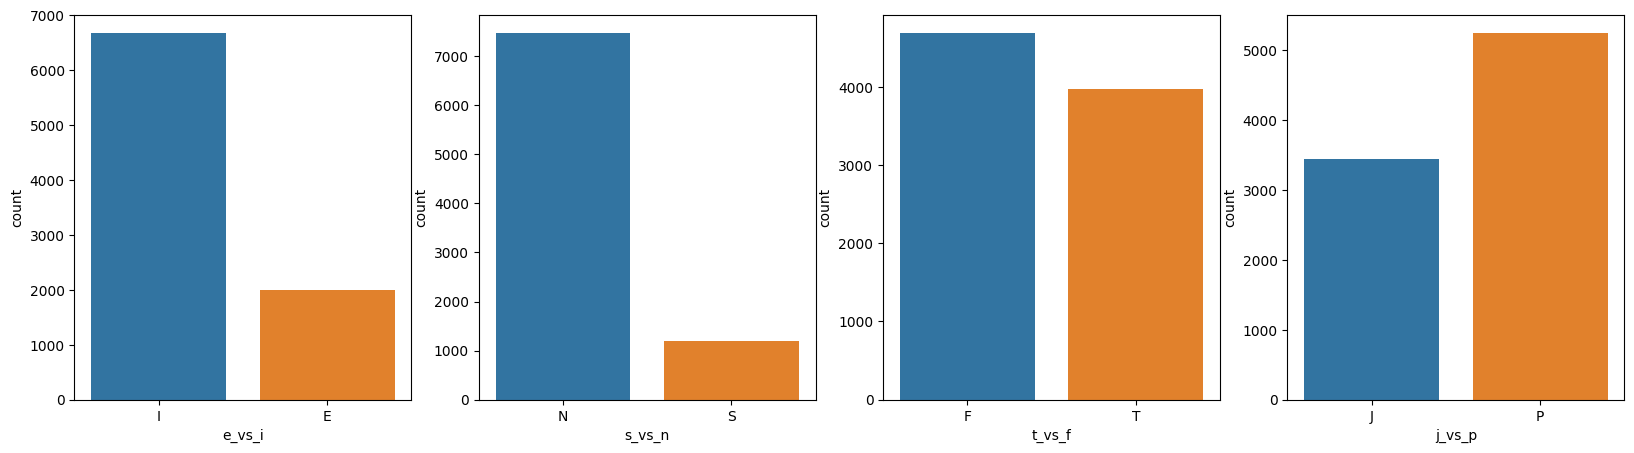

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(20,5))

sns.countplot(data=personality_factors, x="e_vs_i", ax=ax[0])
sns.countplot(data=personality_factors, x="s_vs_n", ax=ax[1])
sns.countplot(data=personality_factors, x="t_vs_f", ax=ax[2])
sns.countplot(data=personality_factors, x="j_vs_p", ax=ax[3])

fig.show()